## sbs24018 - Machine Learning - CA1

##### For my project, I have chosen the area of "Education" and will use the "Student Performance Dataset" dataset found at https://www.kaggle.com/datasets/devansodariya/student-performance-data



In [724]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [725]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [726]:
# Load the dataset
stu_data = pd.read_csv('student_data.csv')

In [727]:
# Display the first 10 rows of the dataset.
stu_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [728]:
# Display dataset info.
stu_data.info()

      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [729]:
# Describe dataset column data.
stu_data.describe()



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [730]:
# Checking null values for all columns.
null_values = stu_data.isnull().sum()
null_values


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [731]:
# Identify the numeric and categorical columns in the dataset:
numeric_cols = stu_data.select_dtypes(include=[np.number]) 
#print(numeric_cols)

# Identify all categorical columns in the stu_data
categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols)

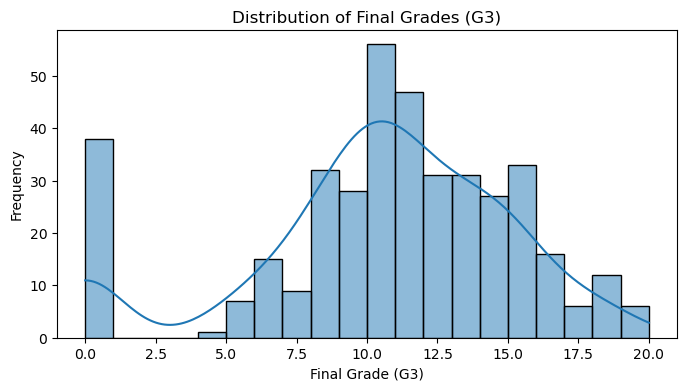

In [732]:
# Visualize the distribution of G3 final exam grades
plt.figure(figsize=(8, 4))
sns.histplot(numeric_cols['G3'], kde=True, binwidth=1)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

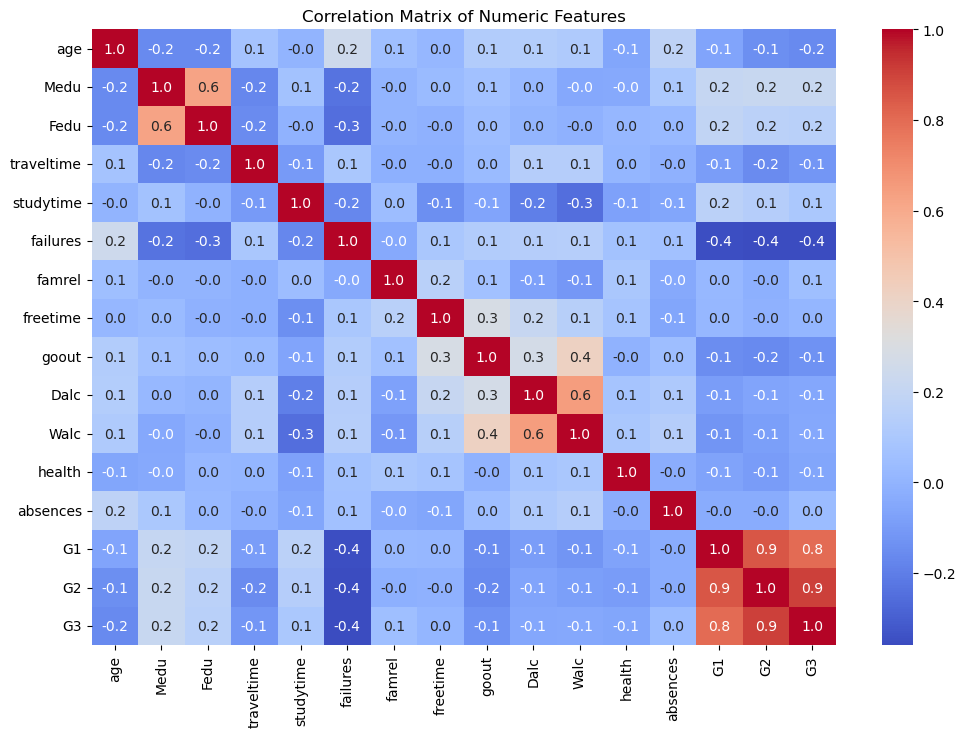

In [733]:
# Calculate and plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

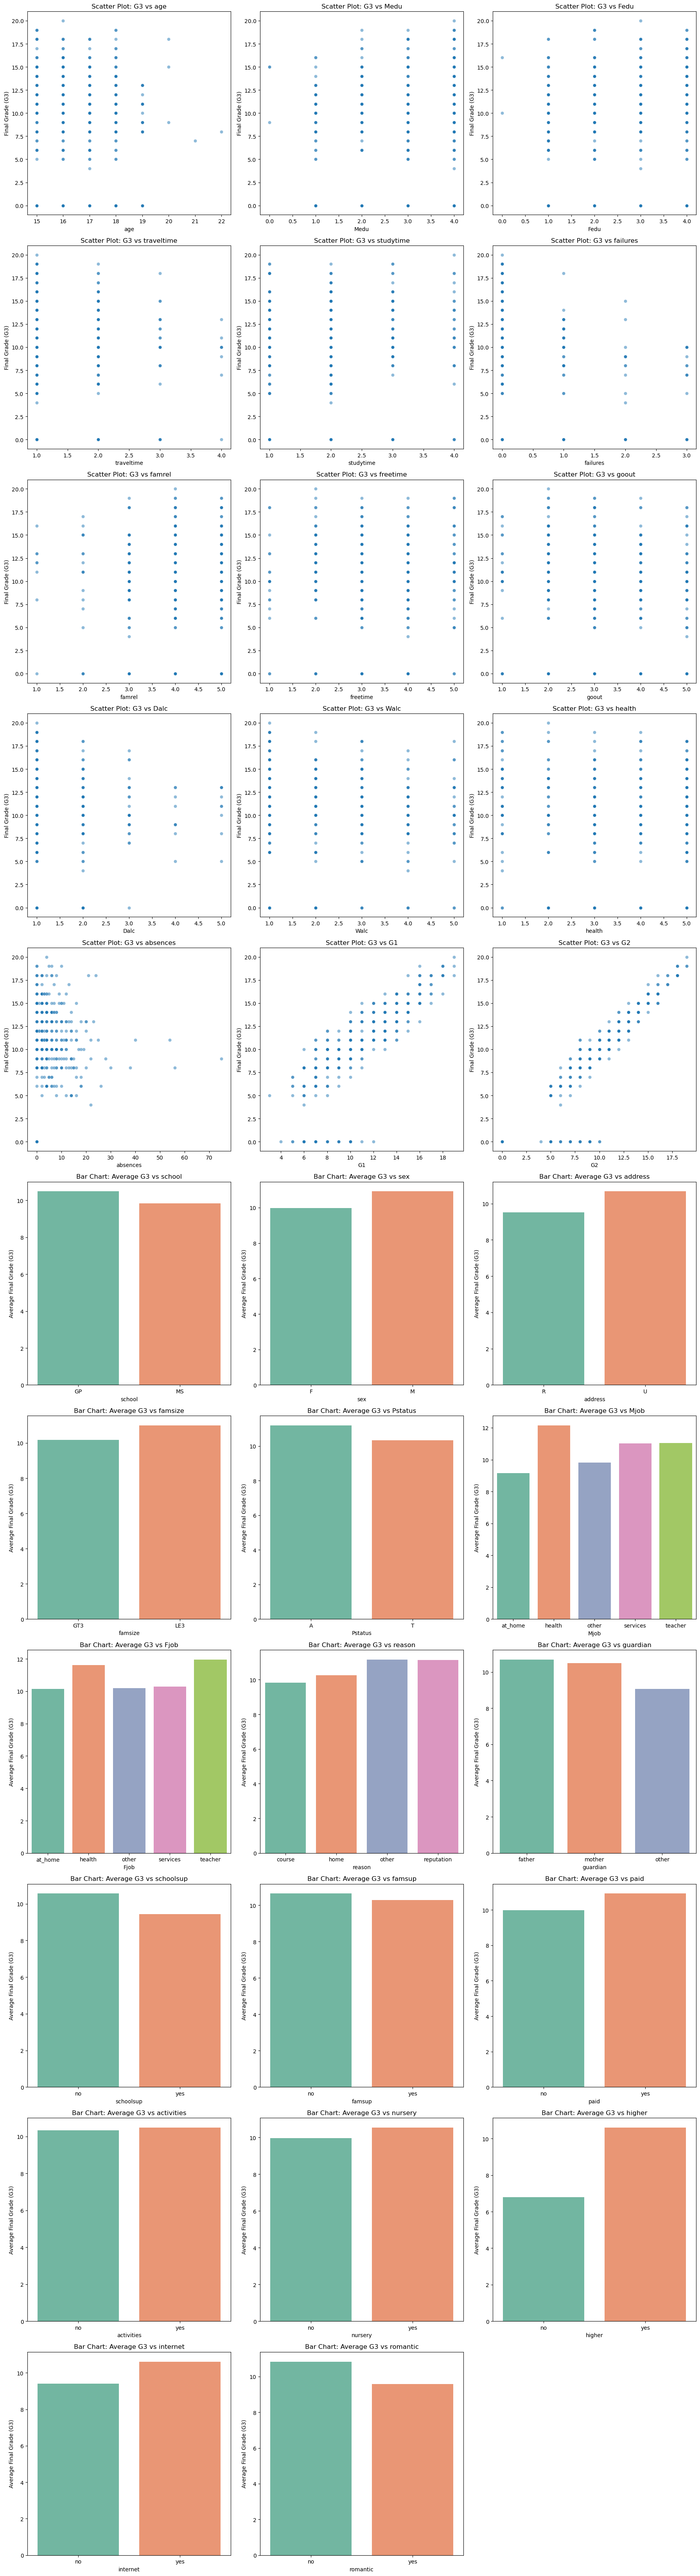

In [734]:
# Identify numeric and categorical columns, excluding 'G3' from numeric if present
numeric_cols = stu_data.select_dtypes(include=[np.number]).columns.tolist()
if 'G3' in numeric_cols:
    numeric_cols.remove('G3')
categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()

# Setting the plotting area and dimensions
num_plots = len(numeric_cols) + len(categorical_cols)
total_rows = num_plots // 3 + (num_plots % 3 > 0)

fig, axes = plt.subplots(nrows=total_rows, ncols=3, figsize=(18, 6 * total_rows))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plotting numeric features with scatter plots
for i, col in enumerate(numeric_cols):
    sns.scatterplot(x=stu_data[col], y=stu_data['G3'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatter Plot: G3 vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Final Grade (G3)')

# Plotting categorical features with bar charts
for j, col in enumerate(categorical_cols):
    # Calculate the mean of G3 for each category and plot
    category_means = stu_data.groupby(col)['G3'].mean().reset_index()
    sns.barplot(x=col, y='G3', data=category_means, ax=axes[len(numeric_cols) + j], palette='Set2')
    axes[len(numeric_cols) + j].set_title(f'Bar Chart: Average G3 vs {col}')
    axes[len(numeric_cols) + j].set_xlabel(col)
    axes[len(numeric_cols) + j].set_ylabel('Average Final Grade (G3)')


# Adjust layout and remove unused subplots if any
for ax in axes[len(numeric_cols) + len(categorical_cols):]:
    ax.remove()
plt.tight_layout()
plt.show()

In [735]:
# Encoding Categorical variables into numerical variables using One hot encoding
one_hot_encoded_data = pd.get_dummies(stu_data, columns=categorical_cols, drop_first=True) # Drop first because I was getting duplicate colums with inverted data
one_hot_encoded_data = one_hot_encoded_data * 1  # This converts True to 1 and False to 0


# first few rows to check the result
print(one_hot_encoded_data.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...                1               0              1           0   
1     1  ...                0               0              0           1   
2     2  ...                1               0              1           0   
3     1  ...                1               0              0           1   
4     1  ...                0               0              0           1   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [736]:
# Display the first 10 rows of the dataset.
one_hot_encoded_data.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
5,16,4,3,1,2,0,5,4,2,1,...,1,0,0,1,1,1,1,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,0,0,0,1,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,1,1,0,0,1,1,0,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,1,0,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,1,0,0,1,1,1,1,1,1,0


In [737]:
numeric_cols = stu_data.select_dtypes(include=[np.number]).columns.tolist() 
#print(numeric_cols)
numeric_cols_v2 = one_hot_encoded_data.select_dtypes(include=[np.number]).columns.tolist() 
#print(numeric_cols, "\n")

categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols)
categorical_cols_v2 = one_hot_encoded_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols, "\n")


all_cols_v2 = one_hot_encoded_data.columns.tolist()
print(all_cols_v2)


['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']


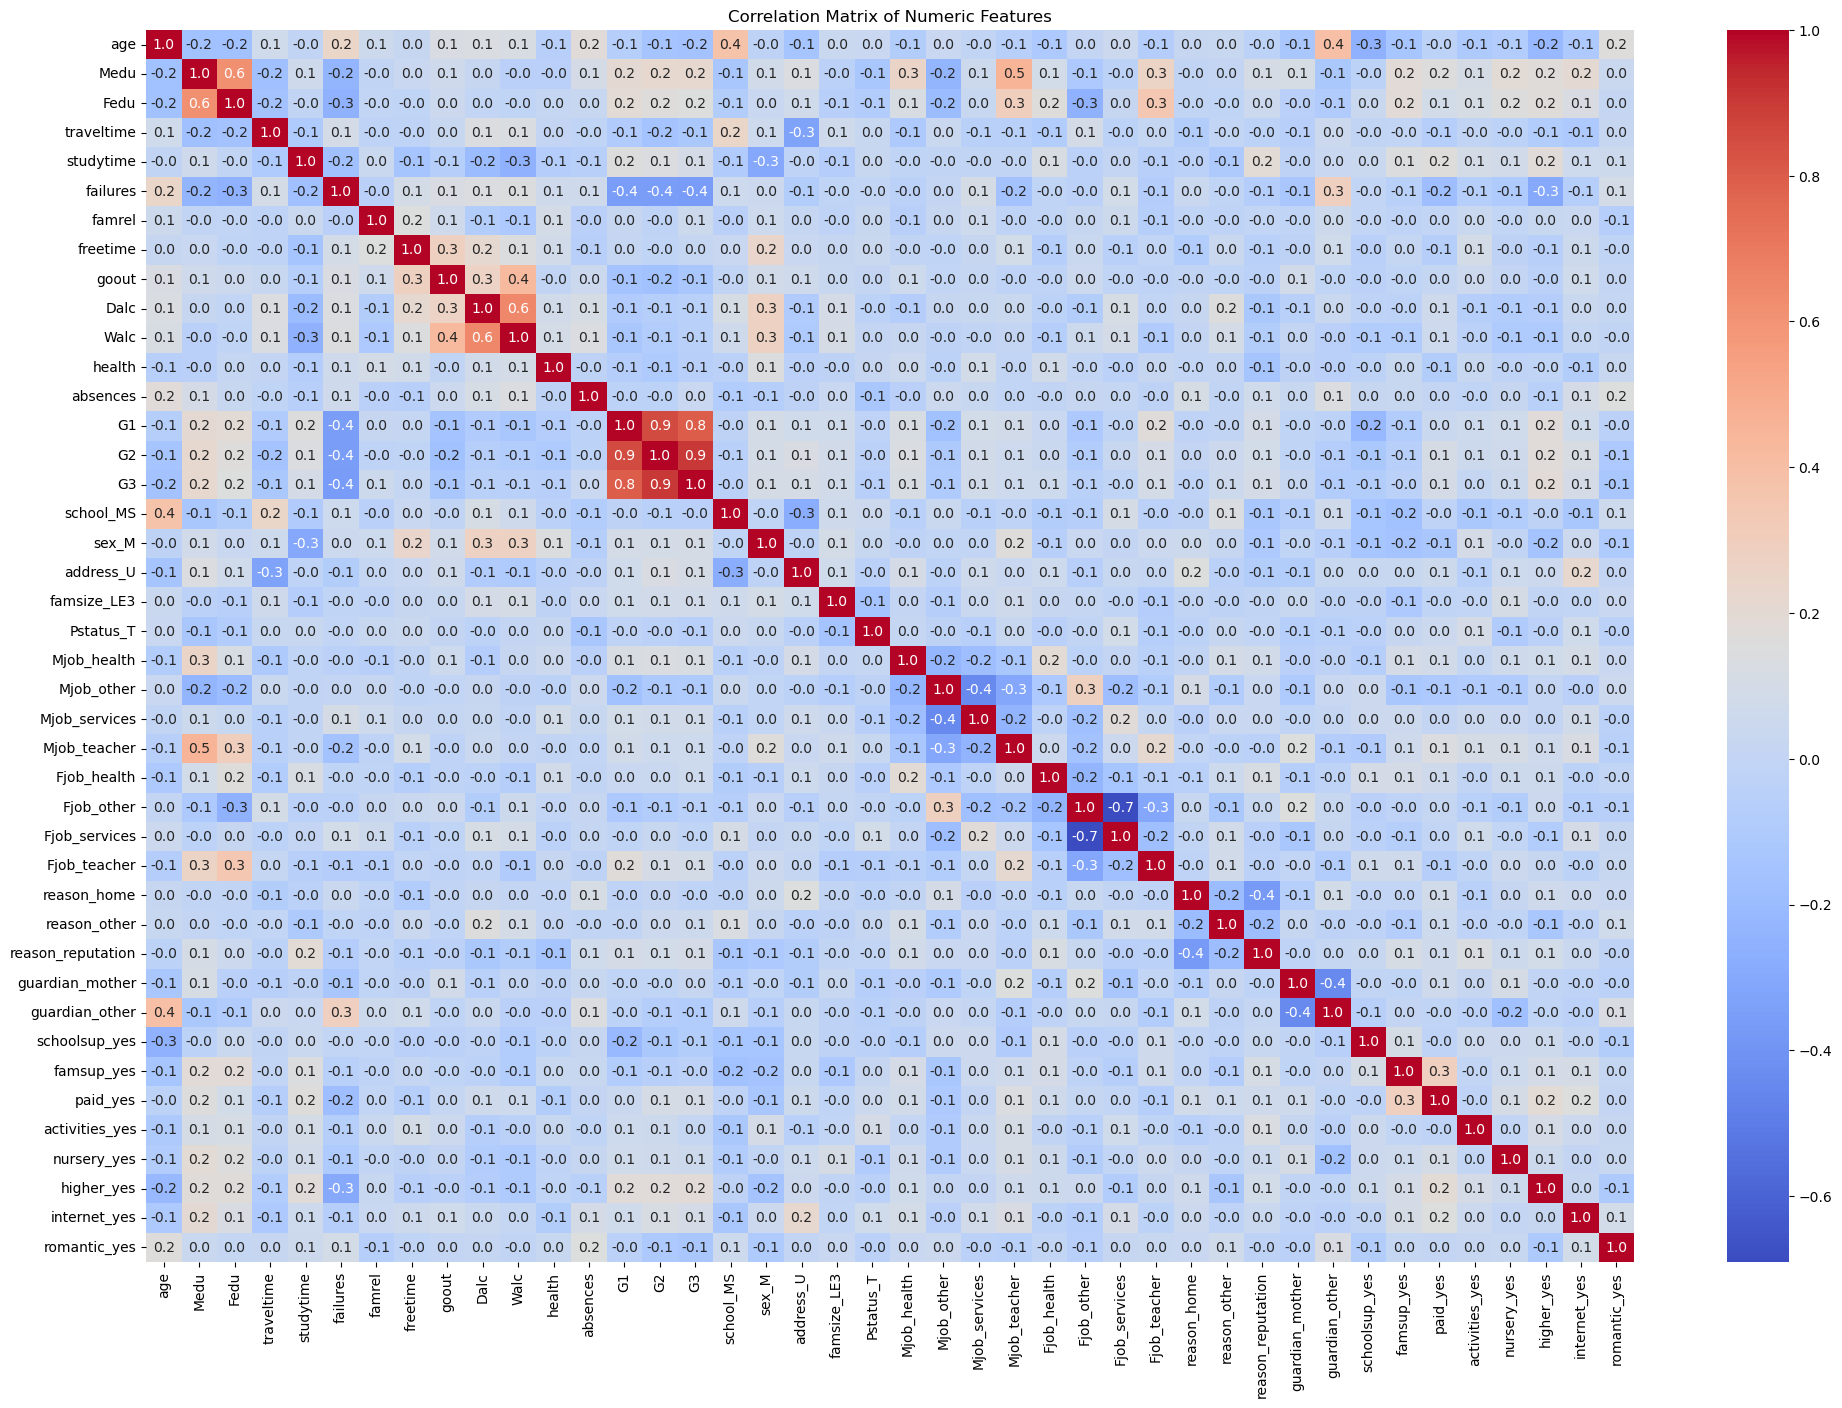

In [738]:
# Calculate and plot the correlation matrix again
plt.figure(figsize=(24, 16))
correlation_matrix = one_hot_encoded_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [739]:
# Split the dataset into X and y columns
X = one_hot_encoded_data.drop('G3', axis=1)  # Independent variables
y = one_hot_encoded_data['G3']  # Dependent variable G3 

# Split the data into training and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Show the rows and columns
print("X:", X.shape)
print("y:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X: (395, 41)
y: (395,)
X_train shape: (296, 41)
X_test shape: (99, 41)
y_train shape: (296,)
y_test shape: (99,)


In [740]:
# Method to calculate the cross validation score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X,
                             y,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [741]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.7814768535960913
STD:  0.07806959169411934




In [742]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

-1.7289663104255464
[-0.12991401  0.00779842 -0.14617061  0.10478782 -0.1009103  -0.13572965
  0.38349255 -0.03941348  0.18135899 -0.24577886  0.04831897  0.0258263
  0.05276522  0.21334173  0.95373486  0.29692013  0.36688037  0.0236334
 -0.08040544 -0.28529384 -0.35806234 -0.13417489 -0.03812406  0.1632791
  0.47376466  0.16345192 -0.11416427 -0.04475325 -0.5580363   0.43283732
 -0.1063799   0.23138453 -0.3145062   0.74578129  0.22612034  0.12000141
 -0.55055969 -0.29078102  0.63888937 -0.16139569 -0.27184515]


In [743]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
y_pred

array([ 6.25083253, 11.83038939,  3.22885433,  9.25756481,  8.7537037 ,
       11.65524566, 18.77414713,  7.15527336,  7.44368684, 12.24559936,
       14.58035661,  5.5699005 , 13.31602777, 11.94371945, 14.64174491,
        8.67680095,  6.09426038, 10.89132007, 13.96446611,  8.09349145,
       13.82710575, 16.35526572, 13.74922118,  5.81789596,  8.04178987,
       20.51960917, 10.74151414,  9.28279971, 16.93978472, 11.08417146,
        9.5589892 ,  6.98634908, 14.63353439, 13.10212711,  5.41313008,
        4.29287071, -2.20240131, 15.43264764, 12.13716351,  7.02916855,
        5.98519352, 10.02659553, 14.51997591,  7.15665628, 17.02899266,
        9.43786772, 11.46660572, 13.59666074, 10.59829511, 15.90188437,
       14.20081173, 14.69621837,  9.92051565,  7.56282074,  3.67557167,
       12.52954999, 10.56965353,  6.73009655, 15.21156289, 16.13212696,
       13.30337338,  7.77373449,  8.73556384,  3.95715071,  3.42072892,
       16.43173533,  8.08520003,  8.82900232,  9.04189945, 16.08

In [744]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
78,10,6.250833
371,12,11.830389
248,5,3.228854
55,10,9.257565
390,9,8.753704


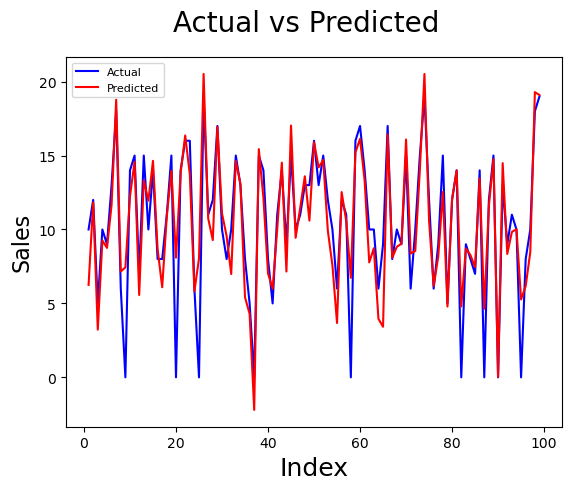

In [745]:
# Ploat actual v prediced values.

c = [i for i in range(1, 100)]  # Generating index adjusted to match y_test and y_pred length

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)                  # X-label
plt.ylabel('Sales', fontsize=16)                  # Y-label
plt.legend(fontsize=8)                            # Adding legend
plt.show()

In [746]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.483800525651309
Mean Squared Error: 5.042664379229086
Root Mean Squared Error: 2.245587758077846
R-squared: 0.781113964140658


##### Training split = 20%
- Mean Absolute Error: 1.6466656197147507
- Mean Squared Error: 5.656642833231222
- Root Mean Squared Error: 2.3783697847961367
- R-squared: 0.7241341236974022

##### Training split = 25%
- Mean Absolute Error: 1.483800525651309
- Mean Squared Error: 5.042664379229086
- Root Mean Squared Error: 2.245587758077846
- R-squared: 0.781113964140658

##### Training split = 30%
- Mean Absolute Error: 1.525057339388754
- Mean Squared Error: 4.993008659924369
- Root Mean Squared Error: 2.234504119469098
- R-squared: 0.7728598737079843


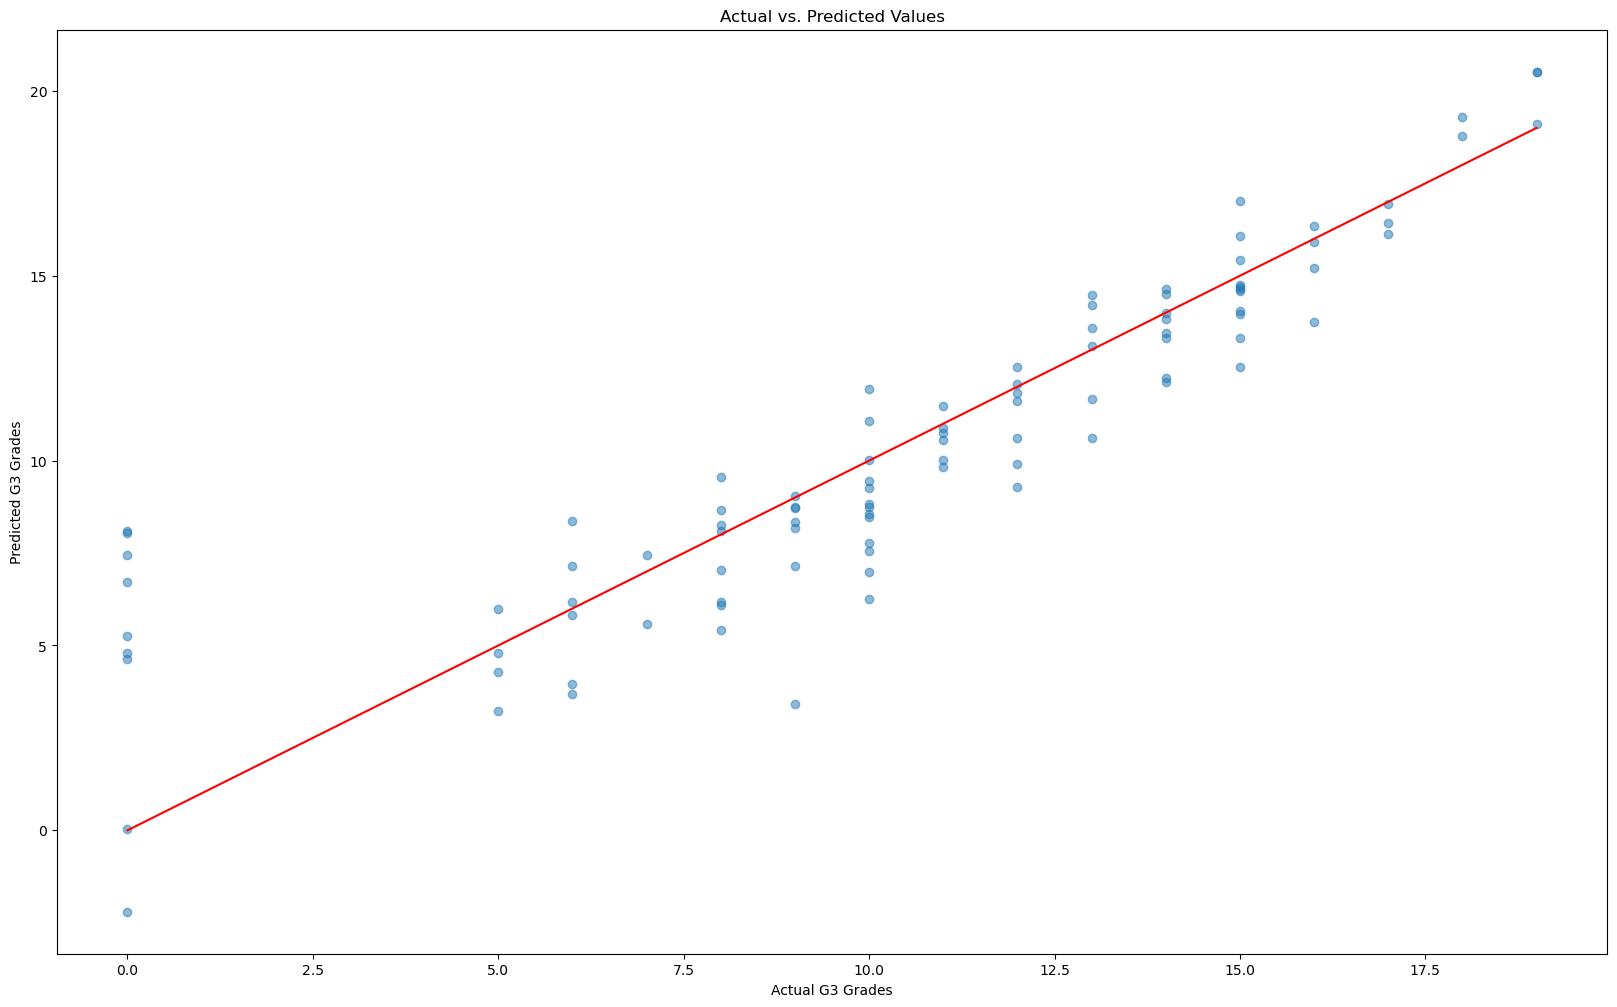

In [747]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(20, 12))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual G3 Grades')
plt.ylabel('Predicted G3 Grades')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line where actual = predicted
plt.show()



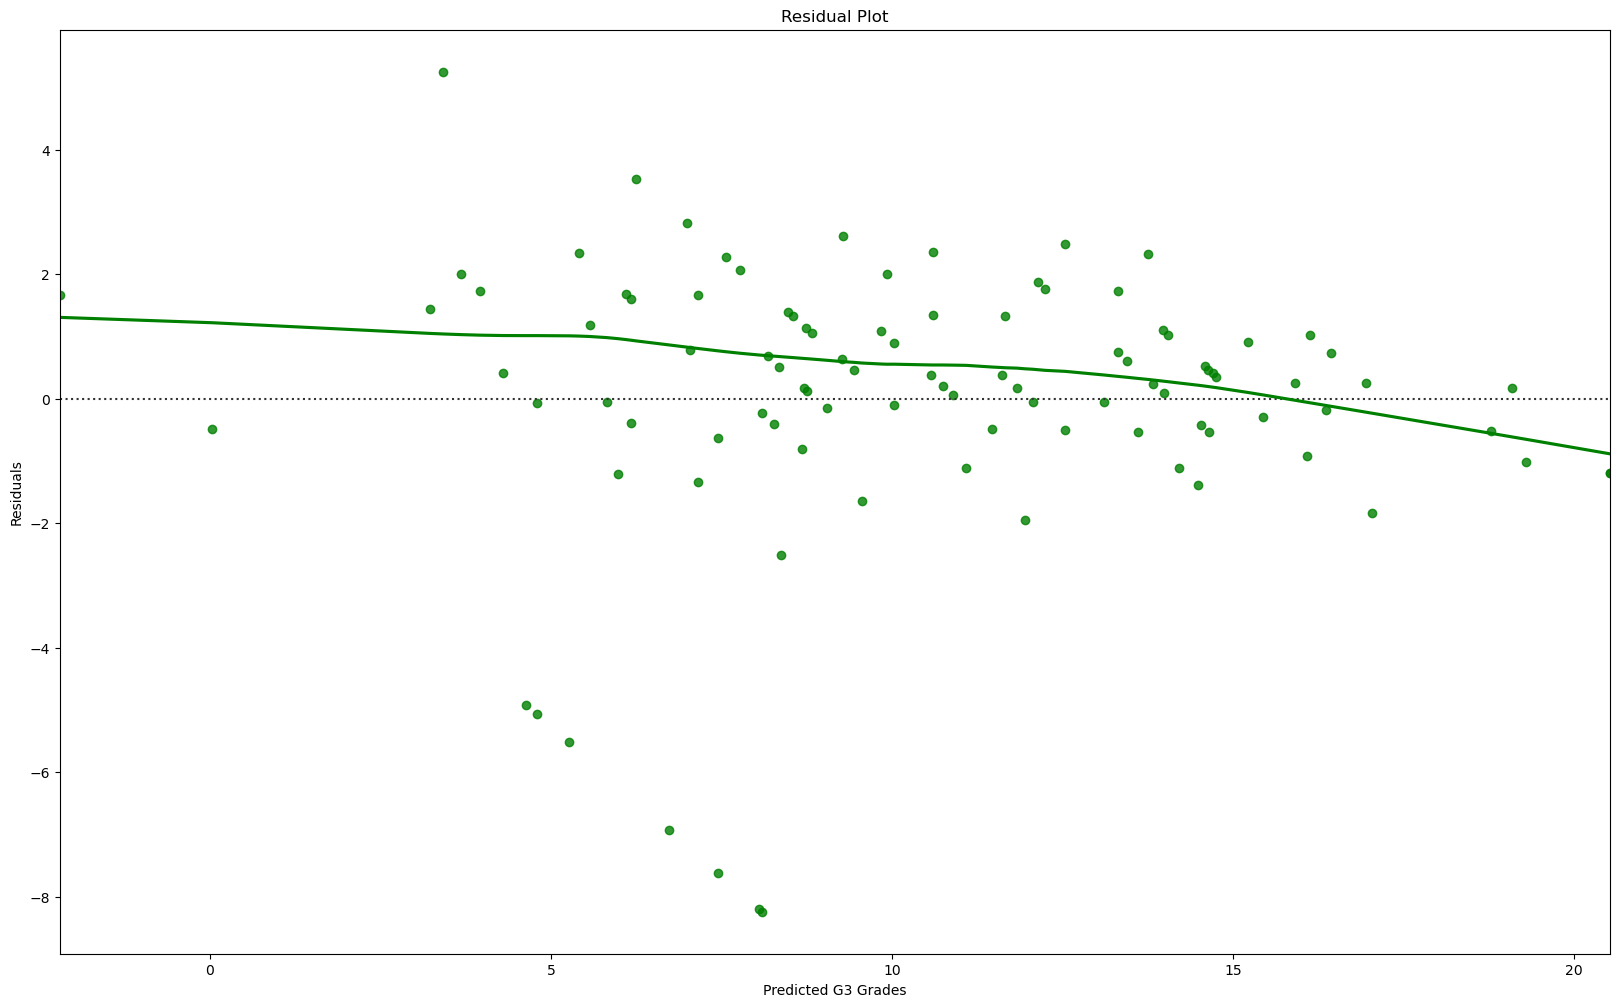

In [748]:
# Residual plot
plt.figure(figsize=(20, 12))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted G3 Grades')
plt.ylabel('Residuals')
plt.show()

In [749]:
# Get the important features using ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)


ExtraTreesRegressor()

In [750]:
print(selection.feature_importances_)

[0.00657295 0.00302052 0.00289793 0.00806755 0.0138895  0.0080095
 0.00626368 0.00358053 0.00632802 0.00243466 0.00324696 0.00804995
 0.03763107 0.29738667 0.52309092 0.00168525 0.00253427 0.00113597
 0.00147069 0.00100612 0.00155445 0.00272801 0.00306223 0.00182117
 0.00054868 0.00251673 0.00473385 0.00063953 0.00906702 0.00067379
 0.00174151 0.00426088 0.00373285 0.00369727 0.0021862  0.00233245
 0.00474913 0.00350915 0.00302179 0.00144947 0.00367112]


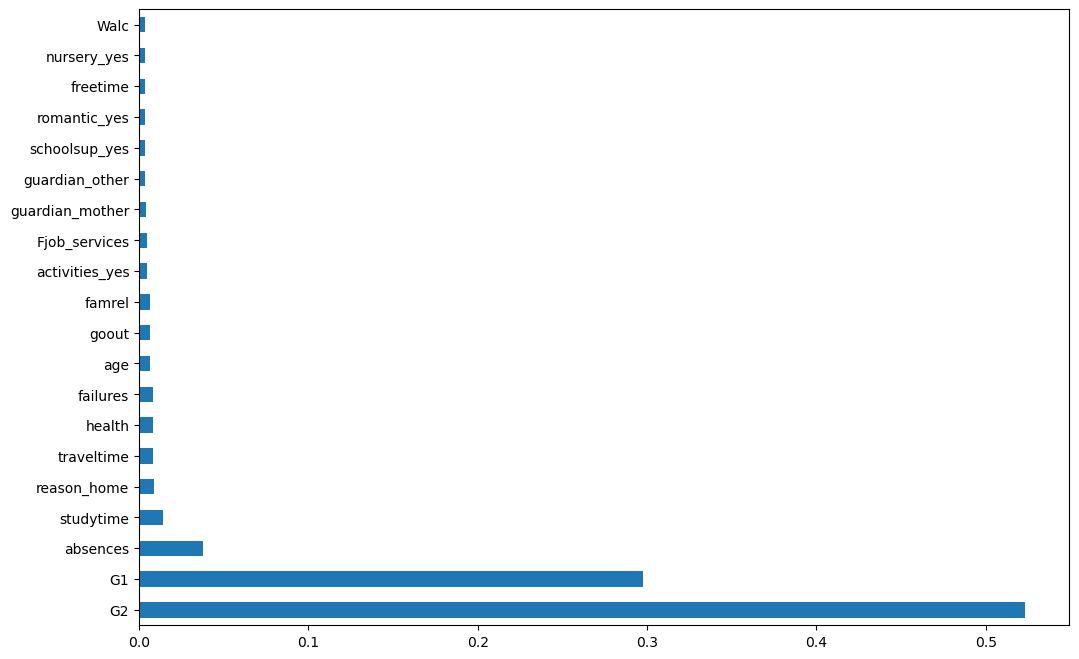

In [751]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

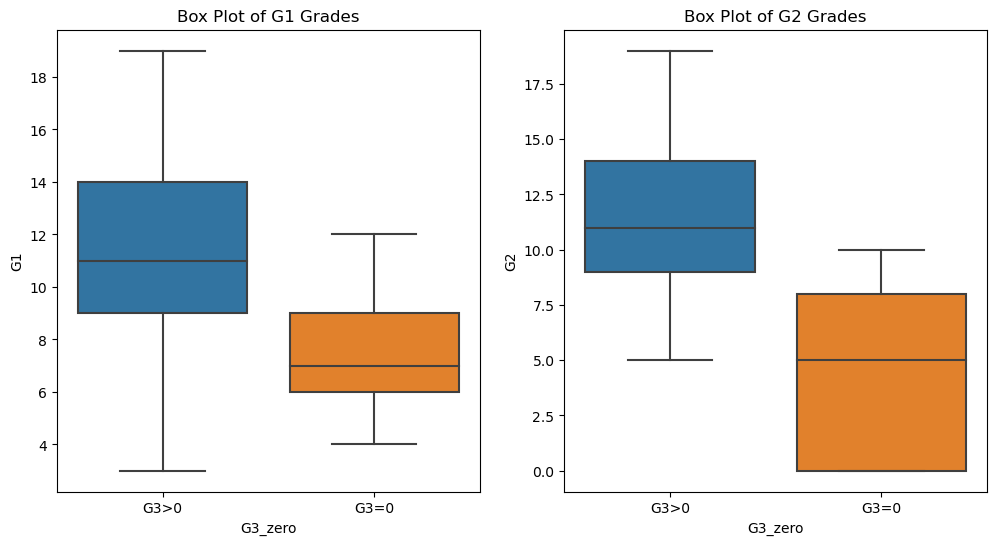

In [752]:
# Create a new column for plotting purposes
stu_data['G3_zero'] = stu_data['G3'].apply(lambda x: 'G3=0' if x == 0 else 'G3>0')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='G3_zero', y='G1', data=stu_data)
plt.title('Box Plot of G1 Grades')

plt.subplot(1, 2, 2)
sns.boxplot(x='G3_zero', y='G2', data=stu_data)
plt.title('Box Plot of G2 Grades')
plt.show()

In [753]:
# I am going to remove the 38 cases where G3 is zero because I am making the assumption that these students did not sit the exam
stu_data_who_sat_exam = one_hot_encoded_data[one_hot_encoded_data['G3'] > 0]


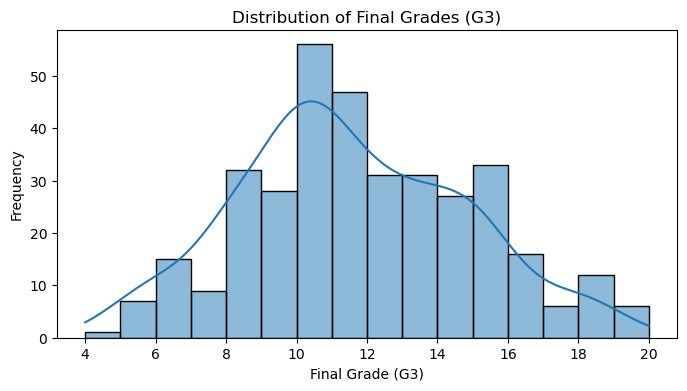

In [754]:
# Visualize the distribution of G3 after I exclude the students who did not sit the exam
plt.figure(figsize=(8, 4))
sns.histplot(stu_data_who_sat_exam['G3'], kde=True, binwidth=1)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

In [755]:
# Split the dataset into X and y columns
X = stu_data_who_sat_exam.drop('G3', axis=1)  # Independent variables
y = stu_data_who_sat_exam['G3']  # Dependent variable G3 

# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Show the rows and columns
print("X:", X.shape)
print("y:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X: (357, 41)
y: (357,)
X_train shape: (249, 41)
X_test shape: (108, 41)
y_train shape: (249,)
y_test shape: (108,)


In [756]:
# Method to calculate the cross validation score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X,
                             y,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

##### Training split = 20% (Including 0 grades)
- Mean Absolute Error: 1.6466656197147507
- Mean Squared Error: 5.656642833231222
- Root Mean Squared Error: 2.3783697847961367
- R-squared: 0.7241341236974022

##### Training split = 20% (Excluding 0 grades)
- Mean Absolute Error: 0.6748214503583269
- Mean Squared Error: 0.8093960199604425
- Root Mean Squared Error: 0.8996643929601985
- R-squared: 0.9159860447415067 

##### Training split = 25% (Including 0 grades)
- Mean Absolute Error: 1.483800525651309
- Mean Squared Error: 5.042664379229086
- Root Mean Squared Error: 2.245587758077846
- R-squared: 0.781113964140658

##### Training split = 25% (Excluding 0 grades)
- Mean Absolute Error: 0.719230638279496
- Mean Squared Error: 0.8832102513840957
- Root Mean Squared Error: 0.93979266404037
- R-squared: 0.9084744506907121 

##### Training split = 30% (Including 0 grades)
- Mean Absolute Error: 1.525057339388754
- Mean Squared Error: 4.993008659924369
- Root Mean Squared Error: 2.234504119469098
- R-squared: 0.7728598737079843

##### Training split = 30% (Excluding 0 grades)
- Mean Absolute Error: 0.7201225256673967
- Mean Squared Error: 0.8840190605458739
- Root Mean Squared Error: 0.9402228781229873
- R-squared: 0.912569543462496


# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(20, 12))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual G3 Grades')
plt.ylabel('Predicted G3 Grades')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line where actual = predicted
plt.show()

In [ ]:
# Residual plot
plt.figure(figsize=(20, 12))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted G3 Grades')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Get the important features using ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)


In [ ]:
print(selection.feature_importances_)

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
# Split the dataset into X and y columns
X = stu_data_who_sat_exam.drop('G3', axis=1)  # Independent variables
y = stu_data_who_sat_exam['G3']  # Dependent variable G3 

# Split the data into training and test sets
def split_data(X, y, test_size=0.30, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [ ]:
# Method to calculate the cross validation score
def get_cv_score(model):
    scores = cross_val_score(model,
                             X,
                             y,
                             cv = 10,
                             scoring='r2')
    
    
    return np.mean(scores)



In [759]:
# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, with_cv=True):
    """
    Trains a model and evaluates it using test data. Optionally performs cross-validation.

    Args:
    model: The machine learning model to evaluate.
    X_train (pd.DataFrame): Training data features.
    y_train (pd.Series): Training data target.
    X_test (pd.DataFrame): Testing data features.
    y_test (pd.Series): Testing data target.
    with_cv (bool): If True, perform cross-validation.

    Returns:
    dict: A dictionary containing evaluation metrics and results.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(y_test, y_pred)
    cv_score = get_cv_score(model, X_train, y_train) if with_cv else None

    results = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R2 Square': r2_square,
        'Cross Validation Score': cv_score
    }
    return results

In [760]:
# Linear Regression Model
lr_results = evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)



TypeError: get_cv_score() takes 1 positional argument but 3 were given

In [571]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the predicted values
y_pred = lr.predict(X_test)
#y_pred


In [572]:
def evaluate_lr(true, predicted):  
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_square = metrics.r2_score(y_test, y_pred)
    print('Mean Absolute Error    : ', mae)
    print('Mean Squared Error     : ', mse)
    print('Root Mean Squared Error: ', rmse)
    print('R2 Square              : ', r2_square)
    print('Cross Validation       : ', get_cv_score(lr))      

In [573]:
# Print evaluation results
print('Evaluation results - Linear Regression:\n')
evaluate_lr(y_test, y_pred)

Evaluation results - Linear Regression:

Mean Absolute Error    :  0.7201225256673967
Mean Squared Error     :  0.8840190605458739
Root Mean Squared Error:  0.9402228781229873
R2 Square              :  0.912569543462496
Cross Validation       :  0.9224235886310483


In [574]:
Test set evaluation - Linear Regression:

MAE             : 0.7201225256673967
MSE             : 0.8840190605458739
RMSE            : 0.9402228781229873
R2 Square       : 0.912569543462496
Cross Validation: 0.9224235886310483

SyntaxError: invalid syntax (2665615269.py, line 1)

In [575]:
# Import the library for the model named as 'SVM'
from sklearn import svm

# Create a classifier
cls_svm = svm.SVR(kernel = "linear")   

# Train the model
cls_svm.fit(X_train, y_train)

# Predict the response
y_pred = cls_svm.predict(X_test)

In [576]:
def evaluate_svm(true, predicted):  
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_square = metrics.r2_score(y_test, y_pred)
    print('Mean Absolute Error    : ', mae)
    print('Mean Squared Error     : ', mse)
    print('Root Mean Squared Error: ', rmse)
    print('R2 Square              : ', r2_square)
    print('Cross Validation       : ', get_cv_score(cls_svm))  

In [577]:
# Print evaluation results
print('Evaluation results - SVM:\n')
evaluate_svm(y_test, y_pred)


Evaluation results - SVM:

Mean Absolute Error    :  0.7425673477768883
Mean Squared Error     :  0.9192415178144336
Root Mean Squared Error:  0.9587708369649307
R2 Square              :  0.9090860037326384
Cross Validation       :  0.9194222366411944


In [578]:
Evaluation results - SVM:

Mean Absolute Error    :  0.7870370370370371
Mean Squared Error     :  1.1203703703703705
Root Mean Squared Error:  1.058475493514314
R2 Square              :  0.8891941391941391
Cross Validation       :  0.8815130562103695


Test set evaluation - SVM:

MAE             : 0.7201225256673967
MSE             : 0.8840190605458739
RMSE            : 0.9402228781229873
R2 Square       : 0.912569543462496
Cross Validation: 0.8815130562103695
    
# SVM

Split      Model                MAE         MSE         RMSE        R2 Square   Cross Validation
20%        SVM                  0.674821    0.809396    0.899664    0.915986    0.881513
25%        SVM                  0.719231    0.88321     0.939793    0.908474    0.881513
30%        SVM                  0.720123    0.884019    0.940223    0.91257     0.881513

SyntaxError: invalid syntax (1331225452.py, line 1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree  

# Create Decision Tree regressor object
dtr = DecisionTreeRegressor(criterion='squared_error', random_state=0)

# Train Decision Tree Regressor
dtr = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = dtr.predict(X_test)

In [ ]:
def evaluate_dtr(true, predicted):  
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_square = metrics.r2_score(y_test, y_pred)
    print('Mean Absolute Error    : ', mae)
    print('Mean Squared Error     : ', mse)
    print('Root Mean Squared Error: ', rmse)
    print('R2 Square              : ', r2_square)
    print('Cross Validation       : ', get_cv_score(dtr))  

In [ ]:
# Print evaluation results
print('Evaluation results - Decision Tree:\n')
evaluate_dtr(y_test, y_pred)


In [ ]:
Evaluation results - Decision Tree:

Mean Absolute Error    :  0.8611111111111112
Mean Squared Error     :  1.3796296296296295
Root Mean Squared Error:  1.174576361770332
R2 Square              :  0.8635531135531136
Cross Validation       :  0.8551966336034319



Test set evaluation:
_____________________________________
MAE: 0.6748214503583269
MSE: 0.8093960199604425
RMSE: 0.8996643929601985
R2 Square 0.9159860447415067
__________________________________


# Decision Tree

Split      Model                MAE         MSE         RMSE        R2 Square   Cross Validation
20%        Decision Tree        0.674821    0.809396    0.899664    0.915986    0.855197
25%        Decision Tree        0.719231    0.88321     0.939793    0.908474    0.855197
30%        Decision Tree        0.720123    0.884019    0.940223    0.91257     0.855197




In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestRegressor 

# Running the random forest with default parameters.
rfc = RandomForestRegressor ()

# fit
rfc.fit(X_train,y_train)

# Making predictions
y_pred = rfc.predict(X_test)

In [ ]:
def evaluate_rfc(true, predicted):  
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_square = metrics.r2_score(y_test, y_pred)
    print('Mean Absolute Error    : ', mae)
    print('Mean Squared Error     : ', mse)
    print('Root Mean Squared Error: ', rmse)
    print('R2 Square              : ', r2_square)
    print('Cross Validation       : ', get_cv_score(rfc))  

In [ ]:
# Print evaluation results
print('Evaluation results -  Random Forest:\n')
evaluate_rfc(y_test, y_pred)

In [579]:
Evaluation results -  Random Forest:

Mean Absolute Error    :  0.8518518518518519
Mean Squared Error     :  1.4814814814814814
Root Mean Squared Error:  1.2171612389003692
R2 Square              :  0.8534798534798534
Cross Validation       :  0.8112124244163569


Test set evaluation:
_____________________________________
MAE             : 0.7201225256673967
MSE             : 0.8840190605458739
RMSE            : 0.9402228781229873
R2 Square       : 0.912569543462496
Cross Validation: 0.9224235886310483
__________________________________


# Random Forest

Split      Model                MAE         MSE         RMSE        R2 Square   Cross Validation
20%        Random Forest        0.674821    0.809396    0.899664    0.915986    0.81447
25%        Random Forest        0.719231    0.88321     0.939793    0.908474    0.805225
30%        Random Forest        0.720123    0.884019    0.940223    0.91257     0.82883

SyntaxError: invalid syntax (3963522141.py, line 1)

In [580]:
# Linear Regression

Split      Model                MAE         MSE         RMSE        R2 Square   Cross Validation
20%        Linear Regression    0.674821    0.809396    0.899664    0.915986    0.922424
25%        Linear Regression    0.719231    0.88321     0.939793    0.908474    0.922424
30%        Linear Regression    0.720123    0.884019    0.940223    0.91257     0.922424

# SVM

Split      Model                MAE         MSE         RMSE        R2 Square   Cross Validation
20%        SVM                  0.674821    0.809396    0.899664    0.915986    0.881513
25%        SVM                  0.719231    0.88321     0.939793    0.908474    0.881513
30%        SVM                  0.720123    0.884019    0.940223    0.91257     0.881513

# Decision Tree

Split      Model                MAE         MSE         RMSE        R2 Square   Cross Validation
20%        Decision Tree        0.674821    0.809396    0.899664    0.915986    0.855197
25%        Decision Tree        0.719231    0.88321     0.939793    0.908474    0.855197
30%        Decision Tree        0.720123    0.884019    0.940223    0.91257     0.855197

# Random Forest

Split      Model                MAE         MSE         RMSE        R2 Square   Cross Validation
20%        Random Forest        0.674821    0.809396    0.899664    0.915986    0.81447
25%        Random Forest        0.719231    0.88321     0.939793    0.908474    0.805225
30%        Random Forest        0.720123    0.884019    0.940223    0.91257     0.82883

SyntaxError: invalid syntax (308880385.py, line 3)

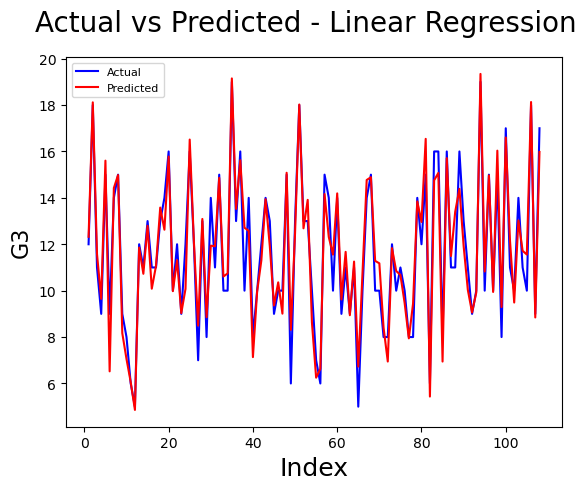

In [505]:
# Ploat actual v prediced values.

c = [i for i in range(1, 109)]  # Generating index to match y_test and y_pred length

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted - Linear Regression', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)                  # X-label
plt.ylabel('G3', fontsize=16)                  # Y-label
plt.legend(fontsize=8)                            # Adding legend
plt.show()

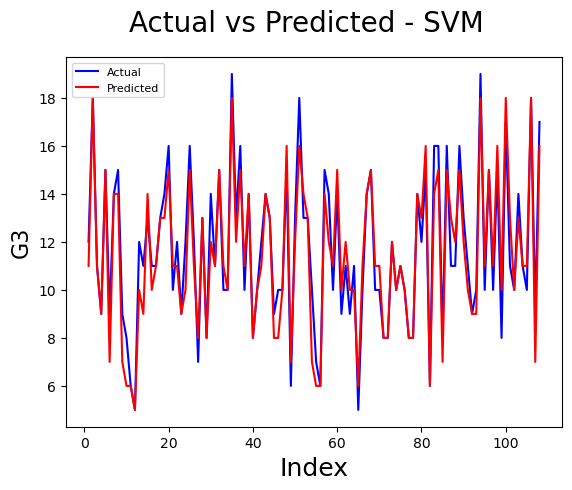

In [521]:
# Ploat actual v prediced values.

c = [i for i in range(1, 109)]  # Generating index to match y_test and y_pred length

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted - SVM', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)                  # X-label
plt.ylabel('G3', fontsize=16)                  # Y-label
plt.legend(fontsize=8)                            # Adding legend
plt.show()

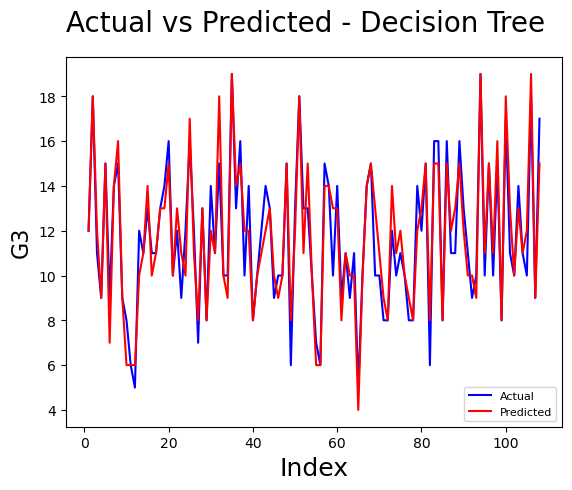

In [528]:
# Ploat actual v prediced values.

c = [i for i in range(1, 109)]  # Generating index to match y_test and y_pred length

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted - Decision Tree', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)                  # X-label
plt.ylabel('G3', fontsize=16)                  # Y-label
plt.legend(fontsize=8)                            # Adding legend
plt.show()

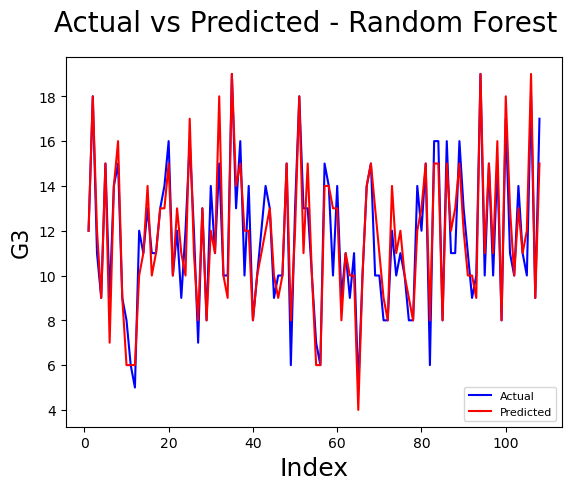

In [499]:
# Ploat actual v prediced values.

c = [i for i in range(1, 109)]  # Generating index to match y_test and y_pred length

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted - Random Forest', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)                  # X-label
plt.ylabel('G3', fontsize=16)                  # Y-label
plt.legend(fontsize=8)                            # Adding legend
plt.show()

In [497]:
clf_results_df = pd.DataFrame(data=[["Decision Tree", *evaluate(y_test, test_pred) , get_cv_score(clf)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
clf_results_df

MAE             : 0.7201225256673967
MSE             : 0.8840190605458739
RMSE            : 0.9402228781229873
R2 Square       : 0.912569543462496
Cross Validation: 0.9224235886310483


TypeError: Value after * must be an iterable, not NoneType

In [305]:
rfc_results_df = pd.DataFrame(data=[["Random Forest", *evaluate(y_test, test_pred) , get_cv_score(rfc)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
rfc_results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Random Forest,0.674821,0.809396,0.899664,0.915986,0.81447
